# 6.5 Unsupervised Machine Learning (Clustering)

### This script contains:
1. Importing libraries and data
2. Data Preprocessing
3. The elbow technique
4. K-Means Clustering
5. Conclusions

## 1. Importing libraries and data

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Ensure that the created graphs stay displayed.

%matplotlib inline

In [3]:
# Set directory path

path= r'C:\Users\hachl\Downloads\OpenProject'

In [4]:
# Import the project data

df = pd.read_csv(os.path.join(path,'DataWHR_Merged.csv'))
df.head()

Country name  Year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.350           0.451   
1  Afghanistan  2009        4.402               7.509           0.552   
2  Afghanistan  2010        4.758               7.614           0.539   
3  Afghanistan  2011        3.832               7.581           0.521   
4  Afghanistan  2012        3.783               7.661           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                              50.5                         0.718       0.168   
1                              50.8                         0.679       0.191   
2                              51.1                         0.600       0.121   
3                              51.4                         0.496       0.164   
4                              51.7                         0.531       0.238   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.414            0.258  
1                      0.850            0.481            0.237  
2                      0.707            0.517            0.275  
3                      0.731            0.480            0.267  
4                      0.776            0.614            0.268

In [5]:
df.shape

(2336, 11)

## 2. Data Preprocessing
    Prep data for analysis: remove categorical variables, rename columns, data standardisation.

In [6]:
# Rename the columns to simpler syntax

df.rename(columns = {'Country name' : 'country', 'Year': 'year', 'Life Ladder' : 'happiness_rate', 'Log GDP per capita' : 'GDP', 'Social support': 'social_support', 'Healthy life expectancy at birth': 'life_expectancy', 'Freedom to make life choices':'freedom_of_choice', 'Generosity':'charity', 'Perceptions of corruption':'perceived_corruption', 'Positive affect':'positive_emotions', 'Negative affect':'negative_emotions'}, inplace = True)
df.columns

Index(['country', 'year', 'happiness_rate', 'GDP', 'social_support',
       'life_expectancy', 'freedom_of_choice', 'charity',
       'perceived_corruption', 'positive_emotions', 'negative_emotions'],
      dtype='object')

In [7]:
# Remove categorical variables

df_segmentation = df.drop(columns=['country'])

In [8]:
df_segmentation

year  happiness_rate    GDP  social_support  life_expectancy  \
0     2008           3.724  7.350           0.451           50.500   
1     2009           4.402  7.509           0.552           50.800   
2     2010           4.758  7.614           0.539           51.100   
3     2011           3.832  7.581           0.521           51.400   
4     2012           3.783  7.661           0.521           51.700   
...    ...             ...    ...             ...              ...   
2331  2023           3.207  7.007           0.652           55.375   
2332  2023           3.204  7.641           0.690           54.050   
2333  2023           3.138  7.394           0.555           54.900   
2334  2023           2.392  9.478           0.530           66.149   
2335  2023           1.859  7.324           0.341           54.712   

      freedom_of_choice  charity  perceived_corruption  positive_emotions  \
0                 0.718    0.168                 0.882              0.414   
1                 0.679    0.191                 0.850              0.481   
2                 0.600    0.121                 0.707              0.517   
3                 0.496    0.164                 0.731              0.480   
4                 0.531    0.238                 0.776              0.614   
...                 ...      ...                   ...                ...   
2331              0.664    0.086                 0.834              0.556   
2332              0.654   -0.046                 0.766              0.651   
2333              0.660    0.105                 0.858              0.561   
2334              0.474   -0.141                 0.891              0.440   
2335              0.382   -0.081                 0.847              0.433   

      negative_emotions  
0                 0.258  
1                 0.237  
2                 0.275  
3                 0.267  
4                 0.268  
...                 ...  
2331              0.289  
2332              0.223  
2333              0.401  
2334              0.356  
2335              0.364  

[2336 rows x 10 columns]

In [9]:
# Use a Standard Scaler to standardise our data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## 3. The elbow technique

In [10]:
# Define the range of potential clusters in the data set.

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
# Apply to 'df_segmentation' & check output

score = [kmeans[i].fit(df_segmentation).score(df_segmentation) for i in range(len(kmeans))] 
n_init=10

score

C:\Users\hachl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\hachl\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\hachl\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\hachl\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\hachl\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: char

[-172262.15996649148,
 -95980.85769287749,
 -63005.21028260697,
 -49005.35238590949,
 -40862.58838112278,
 -34361.84256137623,
 -30356.563749848476,
 -27064.73016641735,
 -24227.133825906676]

This is a list of 9 scores, each one indicating the rate of variation for each cluster option.

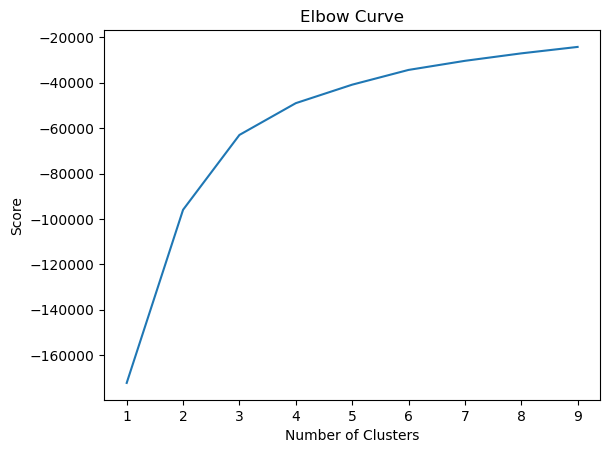

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In our case, there's a large jump from 2 to 3 & a smaller jump from 3 to 4 on the x-axis. After that, the curve pretty much straightens out. This means that the optimal count for out clusters is four.

## 4. K-Means Clustering
Run the k-means algorithm

In [13]:

# Create the k-means object.

kmeans = KMeans(init='k-means++',n_clusters=4, n_init=10)

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df_segmentation)


KMeans(n_clusters=4, n_init=10)

In [15]:
# Attach a new column to your dataframe with the resulting clusters 

df_segmentation['clusters'] = kmeans.fit_predict(df_segmentation)

df_segmentation.head()

year  happiness_rate    GDP  social_support  life_expectancy  \
0  2008           3.724  7.350           0.451             50.5   
1  2009           4.402  7.509           0.552             50.8   
2  2010           4.758  7.614           0.539             51.1   
3  2011           3.832  7.581           0.521             51.4   
4  2012           3.783  7.661           0.521             51.7   

   freedom_of_choice  charity  perceived_corruption  positive_emotions  \
0              0.718    0.168                 0.882              0.414   
1              0.679    0.191                 0.850              0.481   
2              0.600    0.121                 0.707              0.517   
3              0.496    0.164                 0.731              0.480   
4              0.531    0.238                 0.776              0.614   

   negative_emotions  clusters  
0              0.258         0  
1              0.237         0  
2              0.275         0  
3              0.267         0  
4              0.268         0

In [16]:
# Check count for each cluster

df_segmentation['clusters'].value_counts()

clusters
2    823
1    823
3    396
0    294
Name: count, dtype: int64

##### Create a few different visualizations plotting different variables against each other to see the results in terms of the clusters.

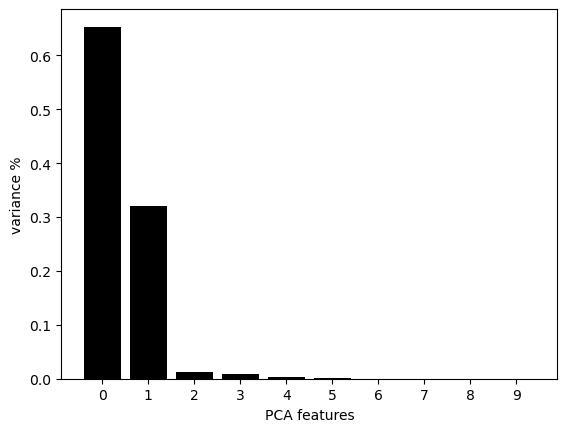

In [17]:
# Reduce Dimensionality to find the optimal number of components  which capture the greatest amount of variance in the data.

from sklearn.decomposition import PCA

# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_segmentation)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)


#### This plot shows a variance drop-off after the second component.  These two variables explain the majority of the variance in our data, however we do not know exactly what their labels are.

Text(0, 0.5, 'PCA 2')

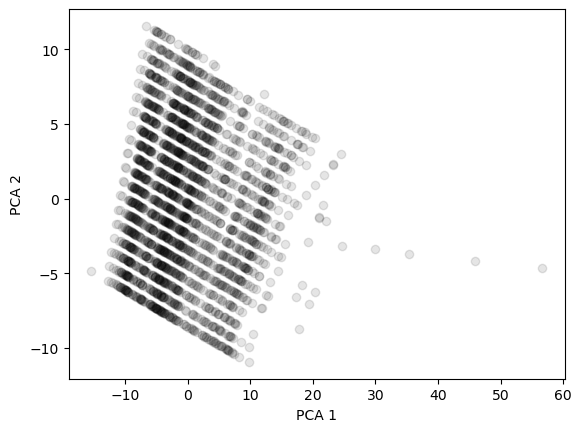

In [18]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

The plot does not show clearly defined clusters, meaning that the data set cannot be grouped further.

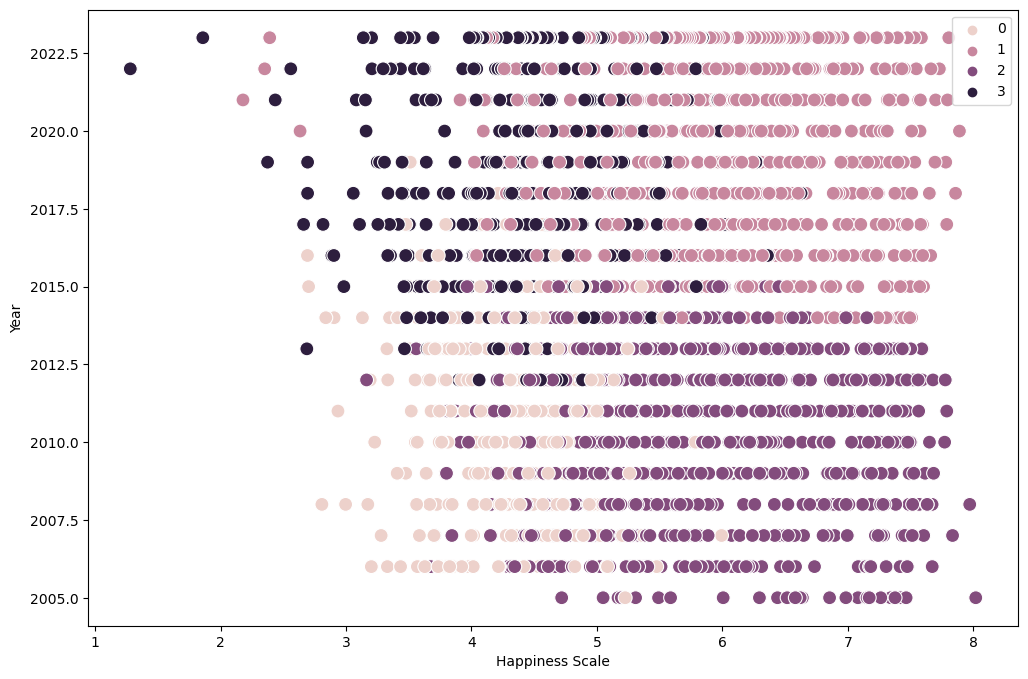

In [19]:
# Plot the clusters for the 'year' and 'happiness_rate' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['happiness_rate'], y=df_segmentation['year'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Scale') # Label x-axis.
plt.ylabel('Year') # Label y-axis.
plt.show()

##### Clusters 0 (light pink) and 2 (purple) gather the most data points throughout the years. Except for a few outliers, they represent the highest happiness values reported by all countries.

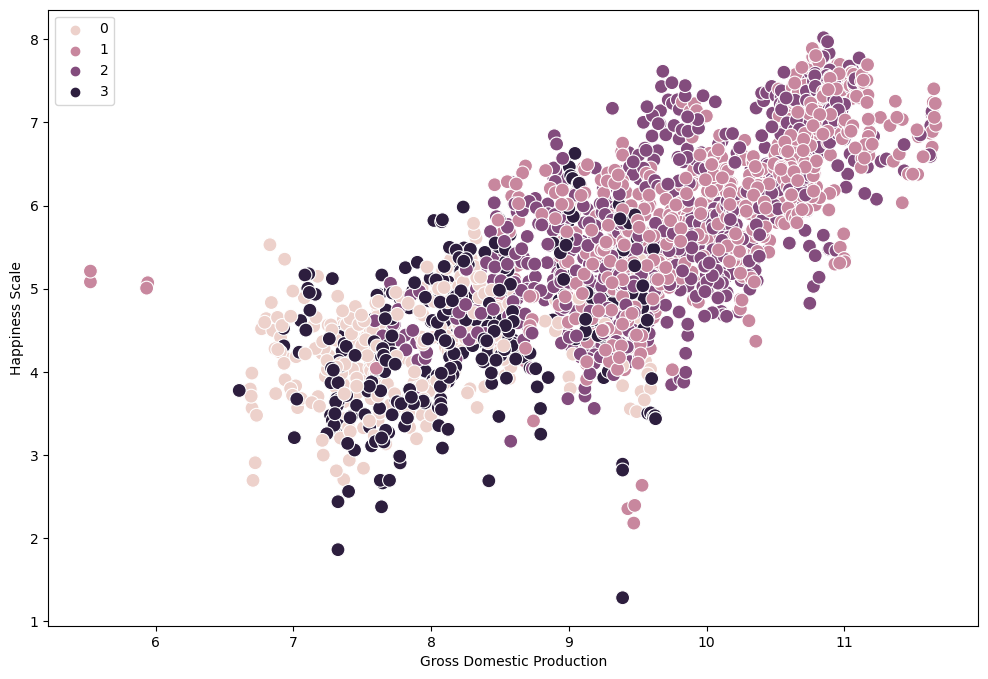

In [20]:
# Plot the clusters for the 'GDP' and 'happiness_rate' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP'], y=df_segmentation['happiness_rate'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Gross Domestic Production') # Label x-axis.
plt.ylabel('Happiness Scale') # Label y-axis.
plt.show()

#### Clusters 1 (pink) and 3 (dark purple) are the least populated, they contain data points of lowest GDP value and mid-low happiness rates, except for few outliers on the higher scale.

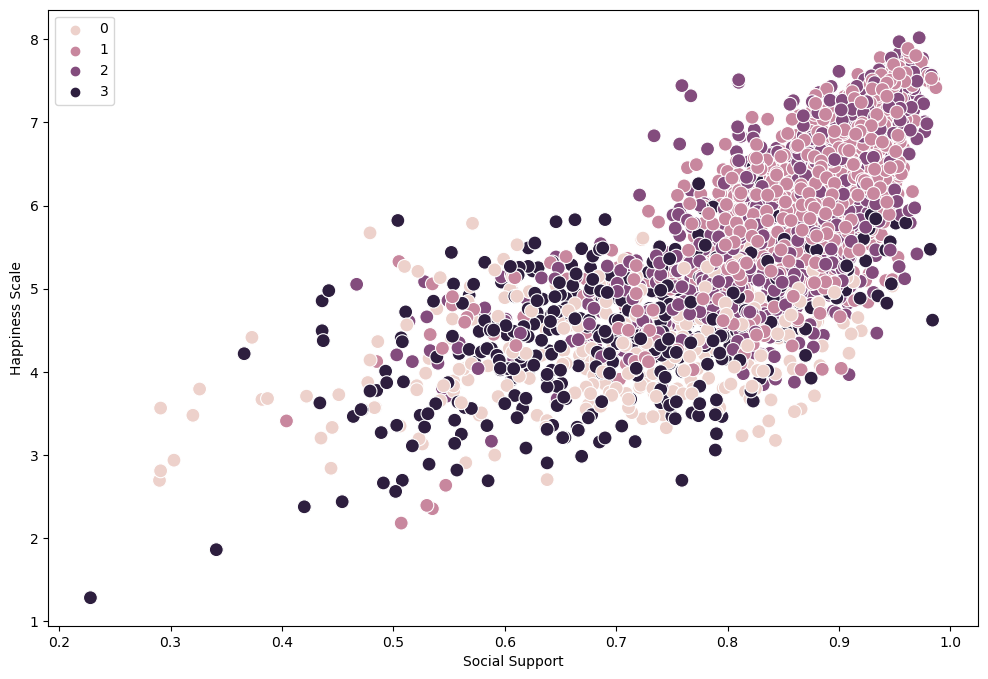

In [21]:
# Plot the clusters for the 'social_support' and 'happiness_rate' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['social_support'], y=df_segmentation['happiness_rate'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Social Support') 
plt.ylabel('Happiness Scale')
plt.show()

#### Clusters 0 (light pink) and 2 (purple) are the most cohesive; they gather data points of high social support and happiness scales. Few outliers are always present.

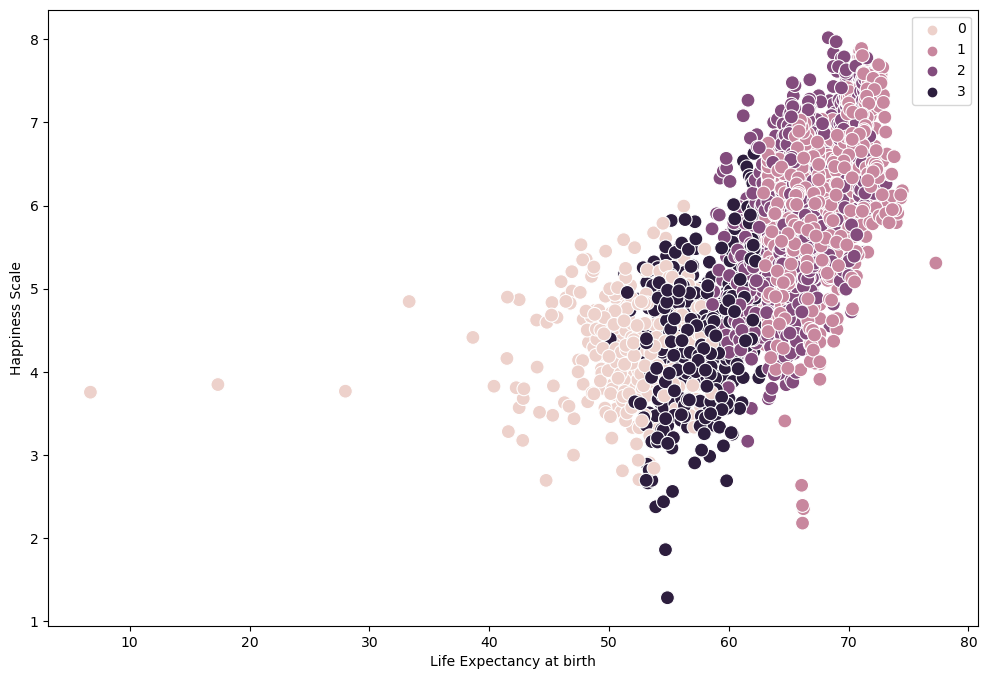

In [22]:
# Plot the clusters for the 'life_expectancy' and 'happiness_rate' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['life_expectancy'], y=df_segmentation['happiness_rate'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Life Expectancy at birth') 
plt.ylabel('Happiness Scale')
plt.show()

#### Except for a few data points, the clusters are concentrated between 45-75 years of healthy life expectancy at birth. The clusters are clearly distinguishable and don´t seem to differ greatly in size.

Check descriptive statistics for each cluster

In [23]:
# Use loc function to relabel the clusters from numbers to color names.

df_segmentation.loc[df_segmentation['clusters'] == 3, 'cluster'] = 'dark purple'
df_segmentation.loc[df_segmentation['clusters'] == 2, 'cluster'] = 'purple'
df_segmentation.loc[df_segmentation['clusters'] == 1, 'cluster'] = 'pink'
df_segmentation.loc[df_segmentation['clusters'] == 0, 'cluster'] = 'light pink'

In [24]:
# Use the groupby() function to separate the data points and calculate their descriptive statistics.

df_segmentation.groupby('cluster').agg({'GDP':['mean', 'median'], 
                         'social_support':['mean', 'median'], 
                         'life_expectancy':['mean', 'median'],
                          'happiness_rate':['mean', 'median']})

GDP          social_support         life_expectancy  \
                  mean   median           mean  median            mean   
cluster                                                                  
dark purple   8.255480   8.2060       0.701260  0.7050       57.595033   
light pink    7.903119   7.8405       0.705963  0.7265       51.316990   
pink         10.101608  10.2100       0.863311  0.8840       68.092933   
purple        9.764763   9.7970       0.846166  0.8640       65.795303   

                    happiness_rate         
             median           mean median  
cluster                                    
dark purple  57.600       4.478510  4.492  
light pink   51.900       4.283085  4.278  
pink         67.875       6.074084  6.113  
purple       65.500       5.803262  5.739

#### The best rated cluster is purple because it has the highest mean and median across the board: highest GDP, highest social support, highest life expectany, and highest happiness rate averages. It´s important to note that variance between the clusters is not huge. The pink cluster scores relatively low with the lowest mean and median in GDP/Life expectancy/Happiness, but not for social support where the dark purple cluster scored slightly lower.

## 5. Conclusions

In [25]:
# Create 3D model to plot all 4 variables we focused on

import plotly.express as px

fig = px.scatter_3d(df_segmentation, x='social_support', y='GDP', z='life_expectancy',
              color='happiness_rate')
fig.show()

- The 3D model above shows how all 4 variables we focused on interact with each other: the majority of data points fall in the middle of the happiness scale (pink-light purple) with an average of 60yrs of life expectancy and mid-high social support & GDP.
- The trends drawn by the plotted variables are the same as we found with regression model. There were no surprising patterns nor labels. 
- It´s possible that cluster centroids were skewed by outliers. Consider removing them for next analysis.
- Our hypotheses seems to prove only partial so far ( the richer a country is/the more social support individuals have/the higher the age of a healthy life expectancy, the happier the sampled nation ).
- Further analysis is necessary to test our hypothesis, specifically a time-series and a spatial analysis considering only mean for each country.
